# Background
The data set contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

# Goal
The goal here is to do analysis about the changes in age/height/weight over time due to the changes in how games played and teams development. 
# Data Source
Below attached link that guide you to the data source:
https://www.kaggle.com/datasets/justinas/nba-players-data

# Import Relevant Package

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import math
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# Import Data
In this section, i will import data that used for the analysis and also drop `Unnamed: 0` column because the feature stored index number 

In [2]:
df = pd.read_csv("all_seasons.csv")
df = df.drop('Unnamed: 0',axis=1)
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

# Exploratory Data Analysis
In this section, I will extract information from the data for the purpose to obtain valuable insight from the data that useful.
I will split this section into two parts:
1. Univariate Analysis
2. Bivariate Analysis & Multivariate Analysis

## Univariate Analysis
So in this part I will analyse each feature seperately. Because of the types f data, I will split this part into two:
1. Categorical Variable Analysis
2. Numerical Variable Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

### Categorical Variable Analysis
This part will elaborate analysis of the categorical feature. The categorical feature are: `player_name`,`team_abbreviation`,`college`,`country`,`draft_year`,`draft_round`,`draft_number`,`season`

In [5]:
cat_feature = ['player_name','team_abbreviation','college','country','draft_year','draft_round','draft_number','season']
for i in cat_feature:
    print(f'{i} = ')
    print(f'total unique value in {i} feature is: {df[i].nunique(dropna = True)}')
    print(df[i].value_counts())
    print('\n')

player_name = 
total unique value in player_name feature is: 2333
Vince Carter         22
Dirk Nowitzki        21
Kobe Bryant          20
Jamal Crawford       20
Kevin Garnett        20
                     ..
Larry Krystkowiak     1
Oliver Lafayette      1
Courtney Fortson      1
Trey Thompkins        1
Chris Babb            1
Name: player_name, Length: 2333, dtype: int64


team_abbreviation = 
total unique value in team_abbreviation feature is: 36
CLE    411
TOR    408
LAC    408
MIA    405
HOU    402
PHI    401
DAL    401
ATL    400
WAS    399
SAS    395
GSW    393
DEN    392
IND    390
LAL    390
MIL    390
ORL    390
NYK    389
CHI    386
BOS    385
POR    383
MIN    382
SAC    378
PHX    377
UTA    377
DET    375
MEM    330
CHA    271
NJN    257
OKC    213
SEA    182
BKN    163
NOH    143
NOP    141
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64


college = 
total unique value in college feature is: 336
None              1715
Kentucky           391
Duke   

From the iteration above, we found out that:
1. Most season that player ever played is 22 season, ther ecord held by Vince Carter. Consequently, The least season player ever played is 1 season
2. The data said there were 36 total teams in NBA when the real number is only 30 teams. I think the reason of this is there were teams in the span of 1996-2020 that disbanded or moved to another place
3. Majority of player in NBA originated from USA
4. It seems that because there were older player played in 1996 above, there were recod of player that drafted before 1996 draft year
5. Because there were player who join NBA undrafted, there were record in the data set about them and few feature like `draft_year`, `draft_number`, `draft_round` as <b>undrafted</b>
6. There were steady deacrease in total player recorded in the league from 1996 to 2020, I think the reason of these steady decrease is the changes in league policy such as the length of contracts, creation oh NBA development league (G League), etc.


### Numerical Variable Analysis

In [6]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


<AxesSubplot:>

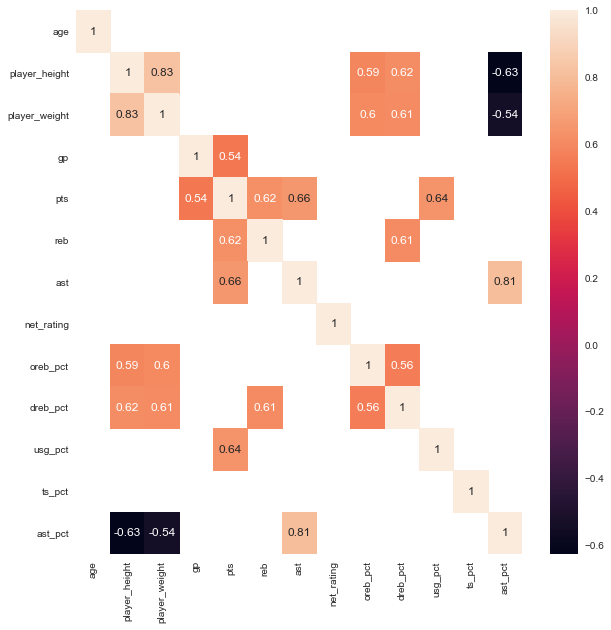

In [7]:
plt.figure(figsize=(10,10))

corr = df.corr()
corr = corr[abs(corr) > 0.5]

sns.heatmap(corr, annot=True)

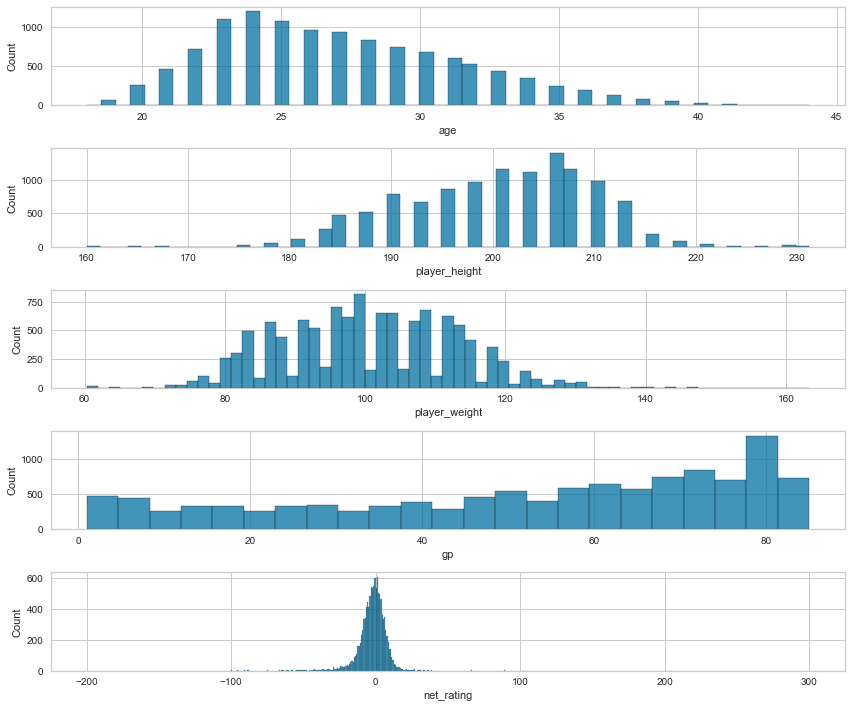

In [8]:
feature = ['age','player_height','player_weight','gp','net_rating']
fig, ax = plt.subplots(len(feature),figsize=(12,10))
count = 0
for i in feature:
    sns.histplot(data=df,x=i,ax=ax[count])
    plt.tight_layout()
    count += 1

From numerical variable analysis, I found that:
1. There were high positive correlation between `player_height`,`player_weight` with `reb`,`oreb_pct`,`dreb_pct`. This indicate that player physical status (height, weight) relate to how much rebound that a player get
2. There were high negative correlation between `player_height`,`player_weight` with `ast_pct`. This indicate that player with big stature had hard time to get many assist, consequently the shorter player stature make them more easy to get assist stats
3. `pts` are affected by `reb`, `ast`, `gp`, and `usg_pct`. It means that the higher rebound, assist, minute play, and usage rate player get in one game indicate the higher point that the player will get
4. Majority of player played in NBA at age range of 22-30. This indicate the prime age of player in NBA
5. NBA Player had average height of 200.7 cm and average weight of 100.5 kg, it much higher than world height and weight average (Weight = 78.1 kg, Height = 175.4 cm). This indicate that one require good physics to be able to play in NBA
6. There were player that had unusual net_rating, for example there were player with net_rate of -200 (Gheorge Muresan) and there were player with net_rate 300 (Bruce Brown). Net_Rating measure how much player contribute in their team in a season, "-200" means that when that particular player play he contribute -200 points for the teams in that season. You can visit <a href="https://www.pivotanalysis.com/post/net-rating">Link</a> for further explanation about Net Rating

## Bivariate and Multivariate Analysis
In this step I will do bivariate and multivariate analysis, I will split this into two section:
1. Draft Analysis
2. NBA Game Analysis
3. Player Analysis

### Draft Analysis

In [9]:
draft_df = df[['player_name','team_abbreviation','age','player_height','player_weight','college','country','draft_year','draft_round','draft_number']]

In [10]:
draft_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25
...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14


In [11]:
label = [0] * len(draft_df)

for i in range(len(draft_df)):
    if draft_df.loc[i, 'country'] == 'USA':
        label[i] = "USA"
    else:
        label[i] = "Others"
draft_df['Label'] = label
draft_df

<ipython-input-11-272b26968948>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df['Label'] = label


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,Label
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,USA
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,USA
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,USA
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,USA
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,USA
...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,Others
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,USA
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,USA
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,USA


* Before I start with the draft analysis, I will drop player that labeled as undrafted, The reason is player that had undrafted status indicate that they were not the player that prefered by NBA teams at the time that they entered the draft class.
* I will also drop player who been draft before 1989, the reason is that NBA applied major change with how teams able to draft people in 1989. The change is the total draft that teams able to use, from 8 round of draft into 2 round of draft.
* I will only use the data player first drafted into NBA, the reason is so that the data can reflected the year that the player drafted

In [12]:
draft_df = draft_df[(draft_df['draft_year']!='Undrafted')&(draft_df['draft_round']!='Undrafted')&(draft_df['draft_number']!='Undrafted')]
column = ['draft_year','draft_round','draft_number']
for i in column:
    draft_df[i] = draft_df[i].astype(int)
draft_df = draft_df[(draft_df['draft_year']>=1989)&(draft_df['draft_round'].isin([1,2]))]
draft_df = draft_df.drop_duplicates(subset='player_name',keep='first')

<ipython-input-12-b7d54b7ee324>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df[i] = draft_df[i].astype(int)


In [13]:
draft_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,Label
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,USA
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,USA
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,USA
5,Martin Lewis,TOR,22.0,198.12,102.05820,Seward County Community College,USA,1995,2,50,USA
10,Mark Hendrickson,PHI,23.0,205.74,99.79024,Washington State,USA,1996,2,31,USA
...,...,...,...,...,...,...,...,...,...,...,...
11603,Jordan Nwora,MIL,22.0,203.20,102.05820,Louisville,USA,2020,2,45,USA
11605,Josh Green,DAL,20.0,195.58,90.71840,Arizona,Australia,2020,1,18,Others
11659,Nick Richards,CHA,23.0,213.36,111.13004,Kentucky,Jamaica,2020,2,42,Others
11661,Nico Mannion,GSW,20.0,187.96,86.18248,Arizona,Italy,2020,2,48,Others


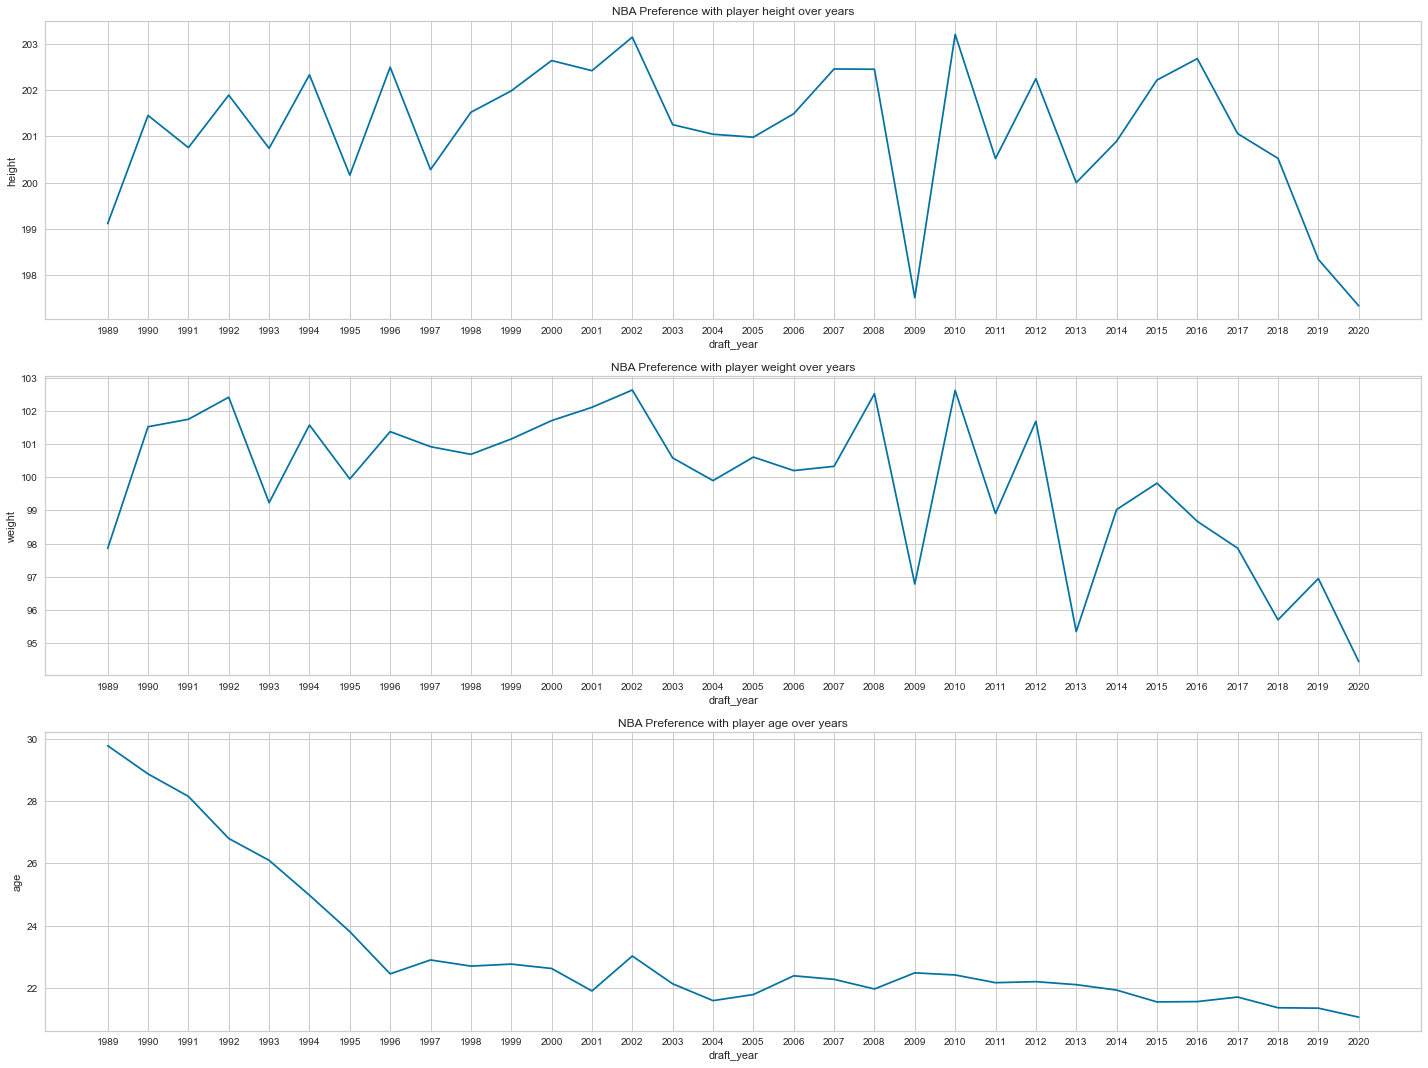

In [14]:
first = draft_df.groupby(['draft_year']).agg(
    height = ('player_height','mean'),
    weight = ('player_weight','mean'),
    age = ('age','mean')
).reset_index()
first['draft_year'] = first['draft_year'].astype(str)
fig, ax = plt.subplots(3, 1, figsize = (20,15))
column = ['height','weight','age']
a = 0
for i in column:
    sns.lineplot(data = first, x = "draft_year", y = i, ax = ax[a]).set_title(f'NBA Preference with player {i} over years')
    plt.tight_layout()
    a += 1

From the visualization above, we know that:
1. There were tendencies in recent time that NBA teams prefered player that had lower height and weight when they pick player in draft. From what I gather trought the internet, this tendency happened because NBA games tends to moves towards to small ball game that required agile and fast paced play. Players that had big posture tends to have shortage in speed and agility, this makes NBA teams not prefer this type of player
2. NBA teams prefer to pick young player, the reason is young player tend to have more potential than the old players

Text(0.5, 1.0, 'Drafted NBA Player Height Distribution')

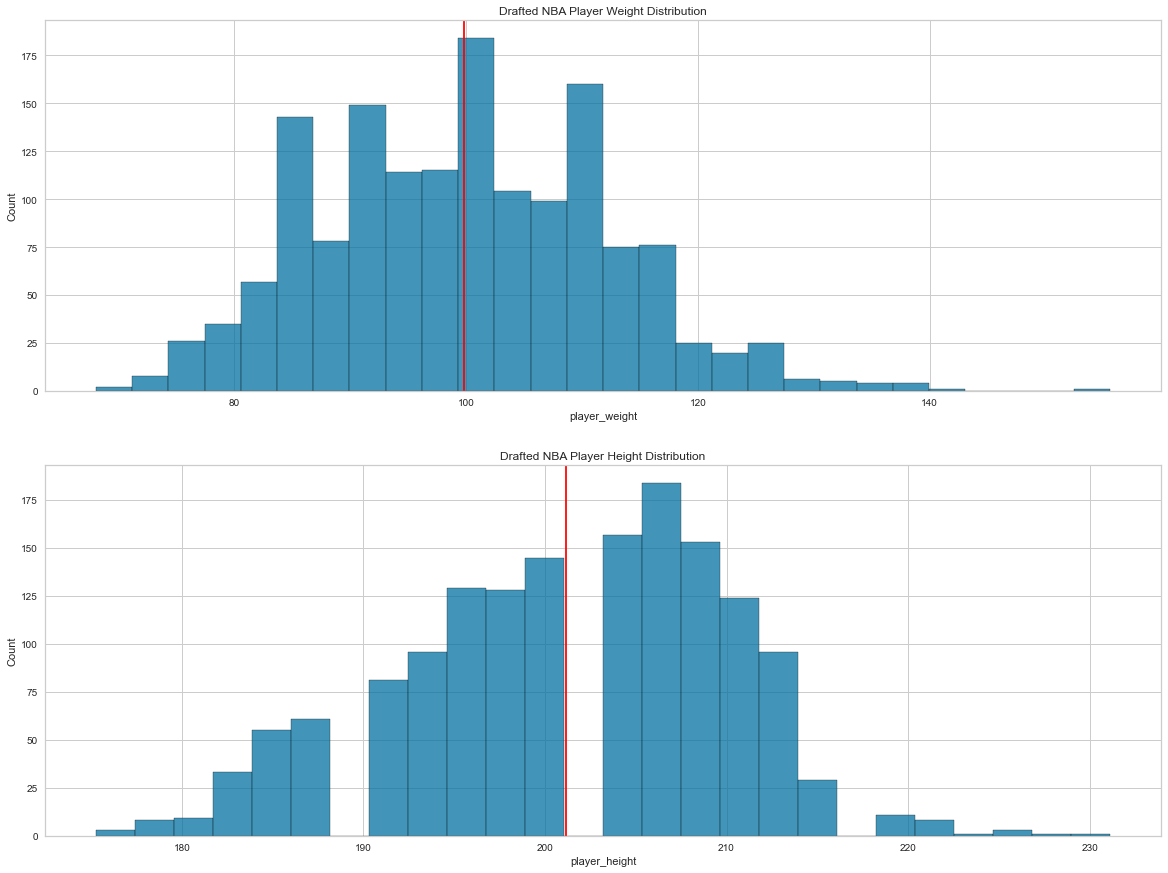

In [15]:
fig, ax = plt.subplots(2, 1, figsize = (20,15))
sns.histplot(data=draft_df,x='player_weight',ax=ax[0])
sns.histplot(data=draft_df,x='player_height',ax=ax[1])
ax[0].axvline(draft_df['player_weight'].mean(),color='red')
ax[1].axvline(draft_df['player_height'].mean(),color='red')
ax[0].set_title('Drafted NBA Player Weight Distribution')
ax[1].set_title('Drafted NBA Player Height Distribution')

From the visualization above, we know player weight and height distribution compared to averaged weight and height of player in NBA

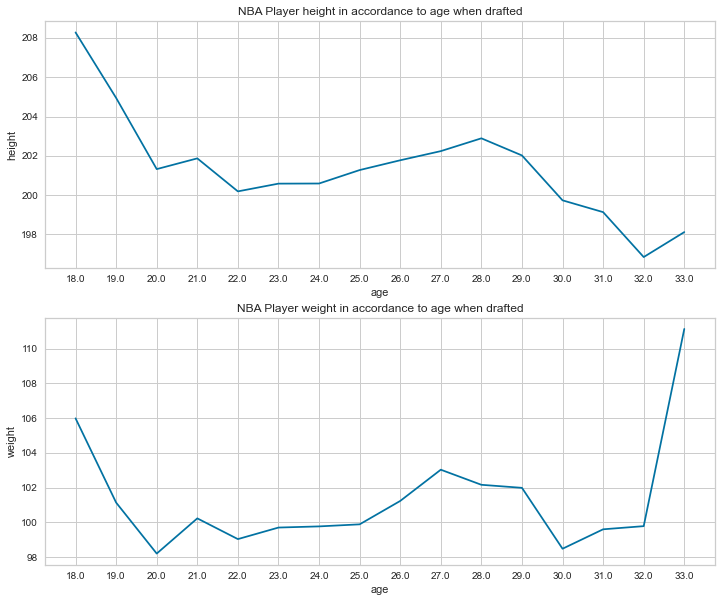

In [17]:
second = draft_df.groupby(['age']).agg(
    height = ('player_height','mean'),
    weight = ('player_weight','mean')
).reset_index()
fig, ax = plt.subplots(2,1,figsize=(12,10))
second['age'] = second['age'].astype(str)
column = ['height','weight']
a = 0
for i in column:
    sns.lineplot(data = second, x = 'age', y = i, ax=ax[a]).set_title(f'NBA Player {i} in accordance to age when drafted')
    a += 1
    

From this visualization we know that on average, the older the player first drafted to NBA, they tend to have higher weight and lower height.   

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


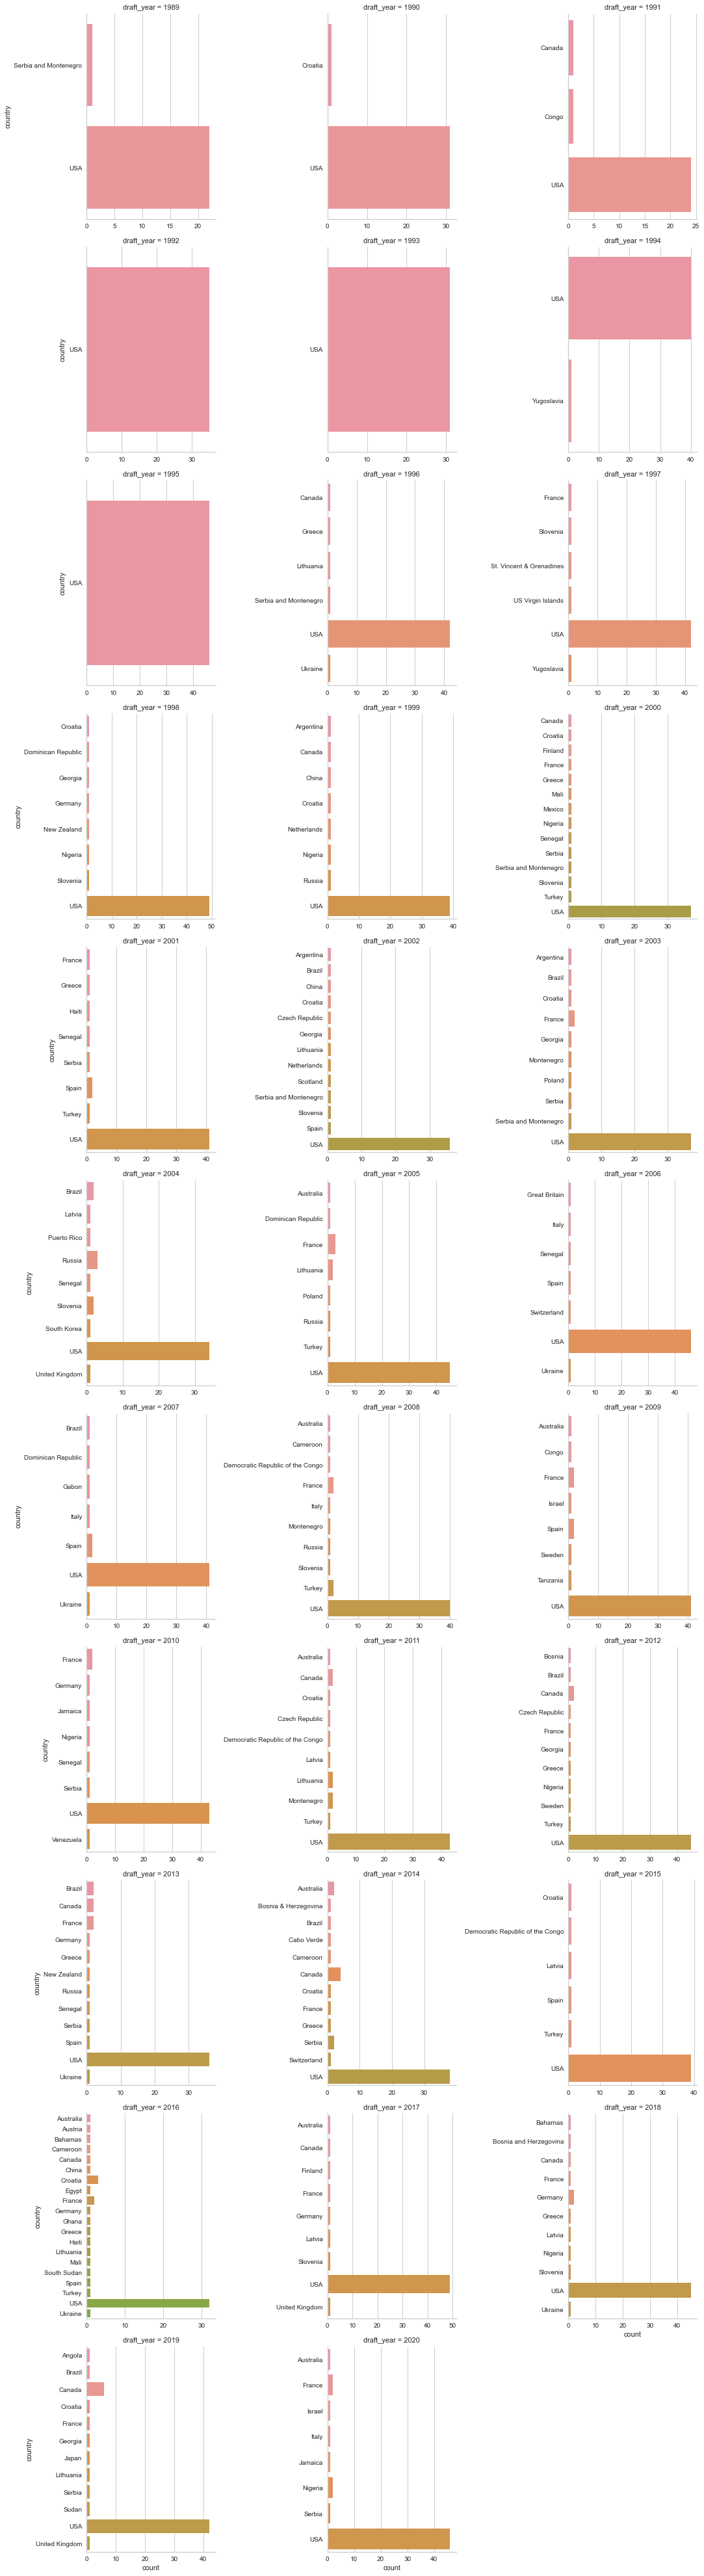

In [21]:
sns.factorplot(data=third,
              col="draft_year",
              col_wrap=3,
              x="count",
              y="country",
              kind="bar",
              sharey= False,
              sharex = False)

From the visualization above, we know that over years NBA teams has strength it's interest to foreign players. It was shown by the increase of player drafted that originated outside of USA

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


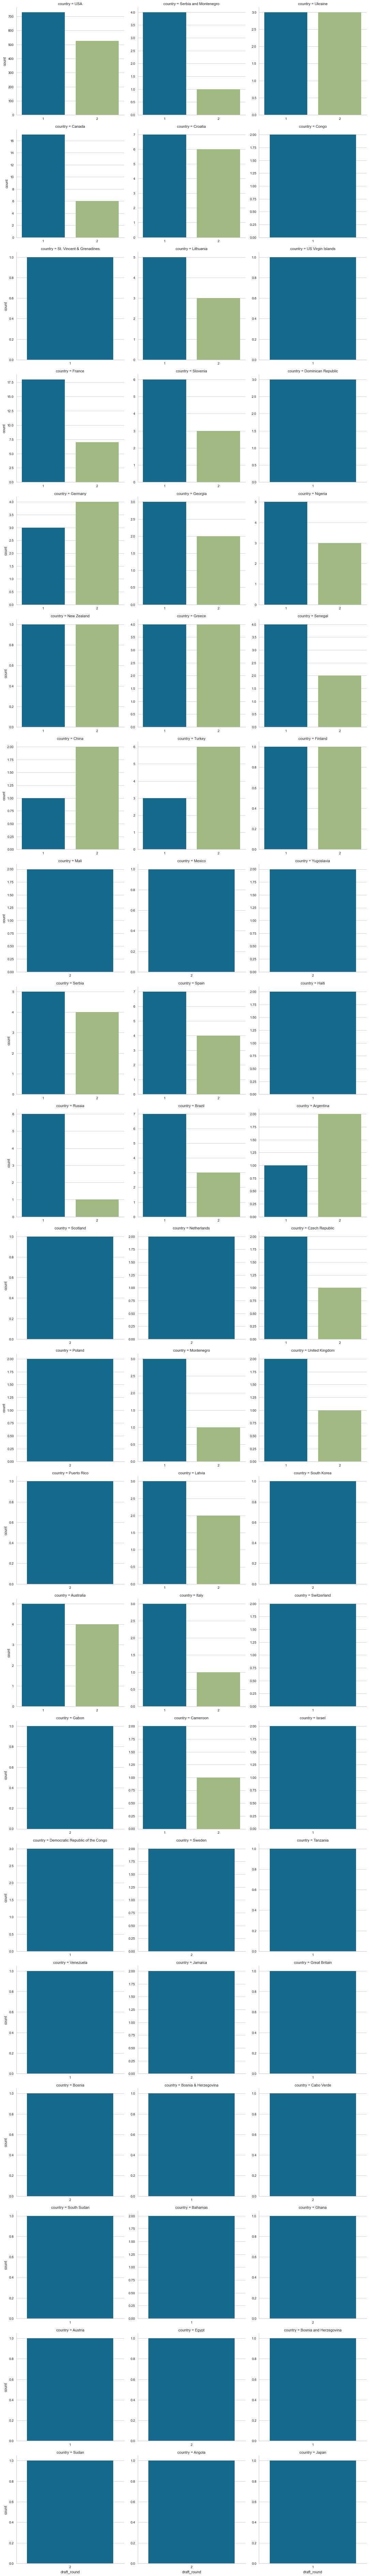

In [22]:
sns.factorplot(data=draft_df,
              col='country',
              col_wrap=3,
              x="draft_round",
              kind="count",
              sharey= False,
              sharex = False)

From the visualization above, we know that USA had the most player drafted compared to other country. We also know that there were countries that had its majority of player drafted through second round pick, there were countries that had its majority of player drafted through first round pick, and there were countries that had its player drafted through first round pick

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


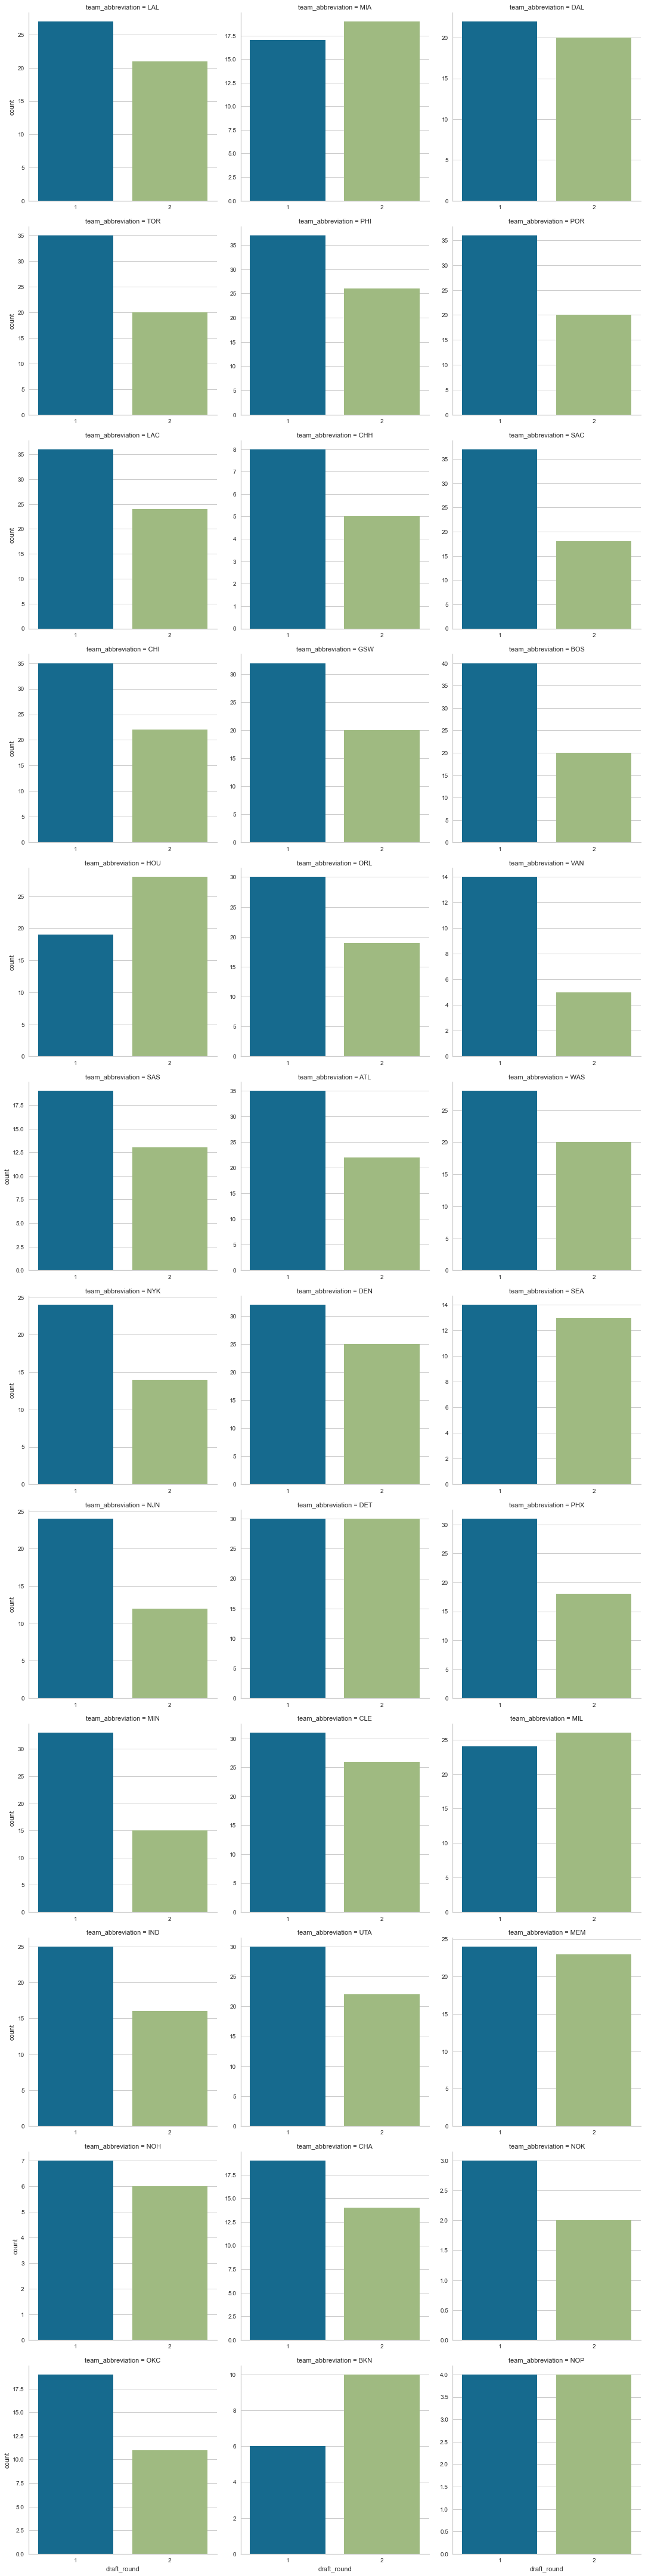

In [23]:
sns.factorplot(data=draft_df,
              col='team_abbreviation',
              col_wrap=3,
              x="draft_round",
              kind="count",
              sharey= False,
              sharex = False)

From the visualization above, we know that there were teams that had more second round pick player than first round pick player (example: Miami Heat, San Antonio Spurs, Brooklyn Nets, etc.) and also teams that had more first round pick player than second round pick (example: Golden State Warrior, Boston Celtics, Chicago Bulls, etc.)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3805: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


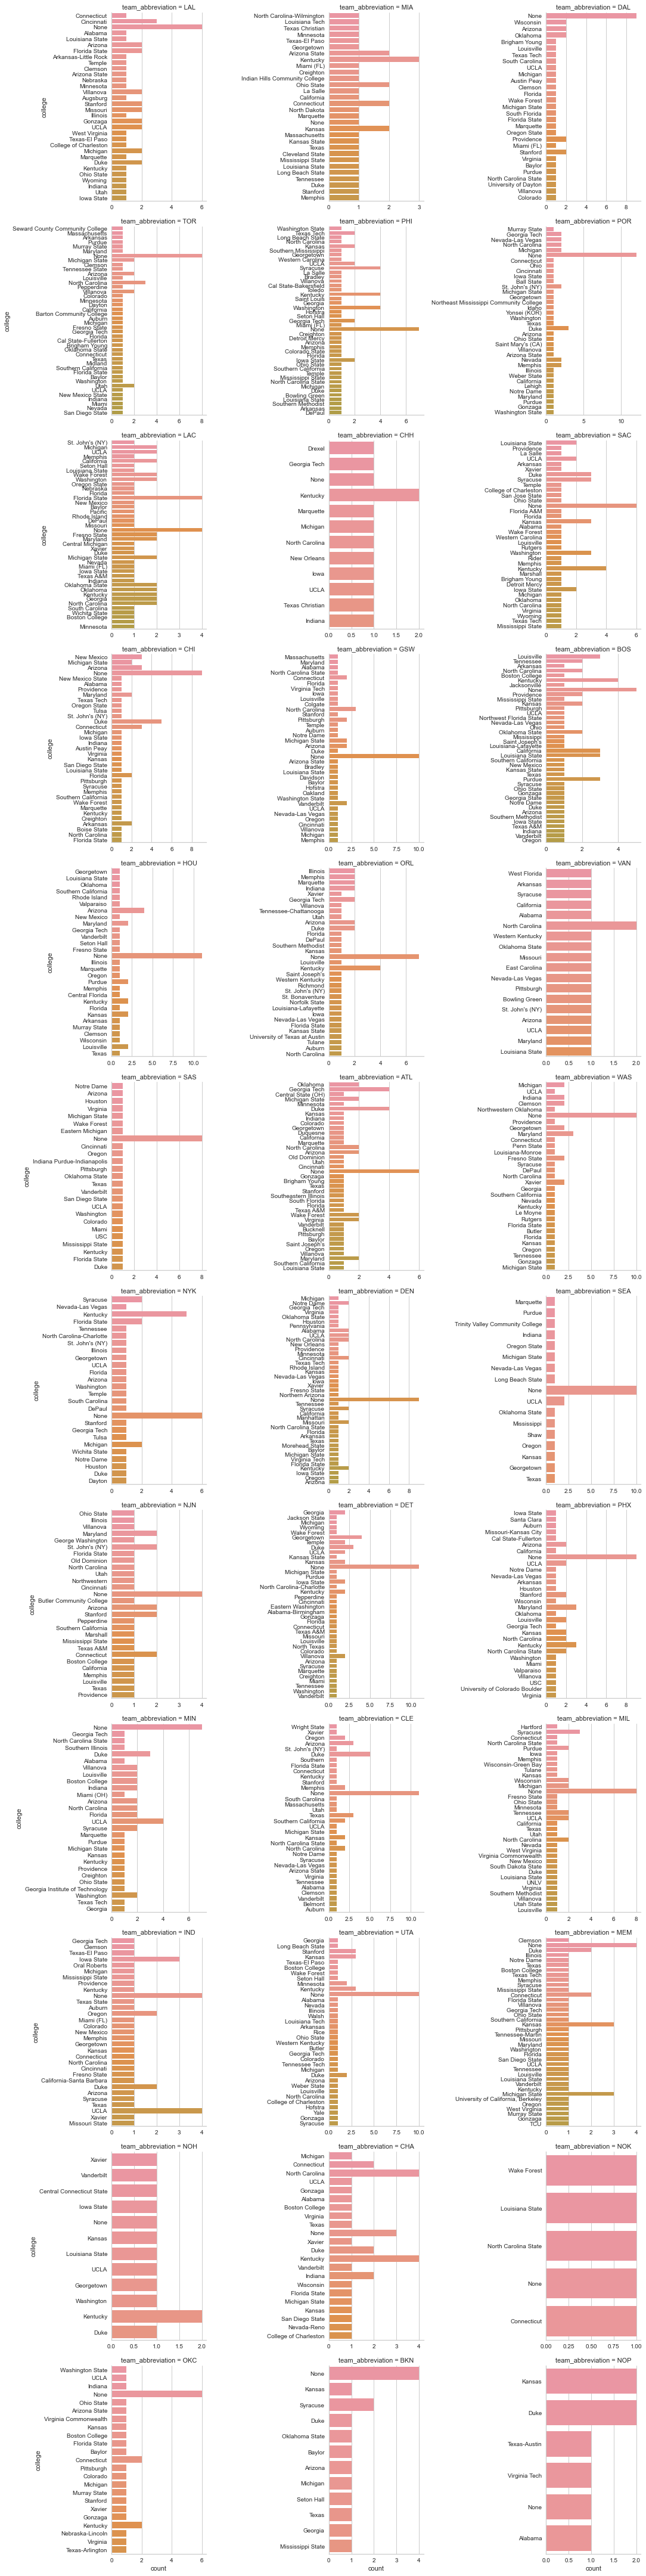

In [24]:
sns.factorplot(data=draft_df,
              col='team_abbreviation',
              col_wrap=3,
              y="college",
              kind="count",
              sharey= False,
              sharex = False)

From the visualization above, we know that NBA teams tends to pick player that already join the college than player who participated the NBA when they gradulated from high school. I think the reason of this trend is player who join from college tends to have more experience throught the NCAA league

### NBA Game Analysis

<ipython-input-28-dcf5320e5b99>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)
<ipython-input-28-dcf5320e5b99>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)
<ipython-input-28-dcf5320e5b99>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)


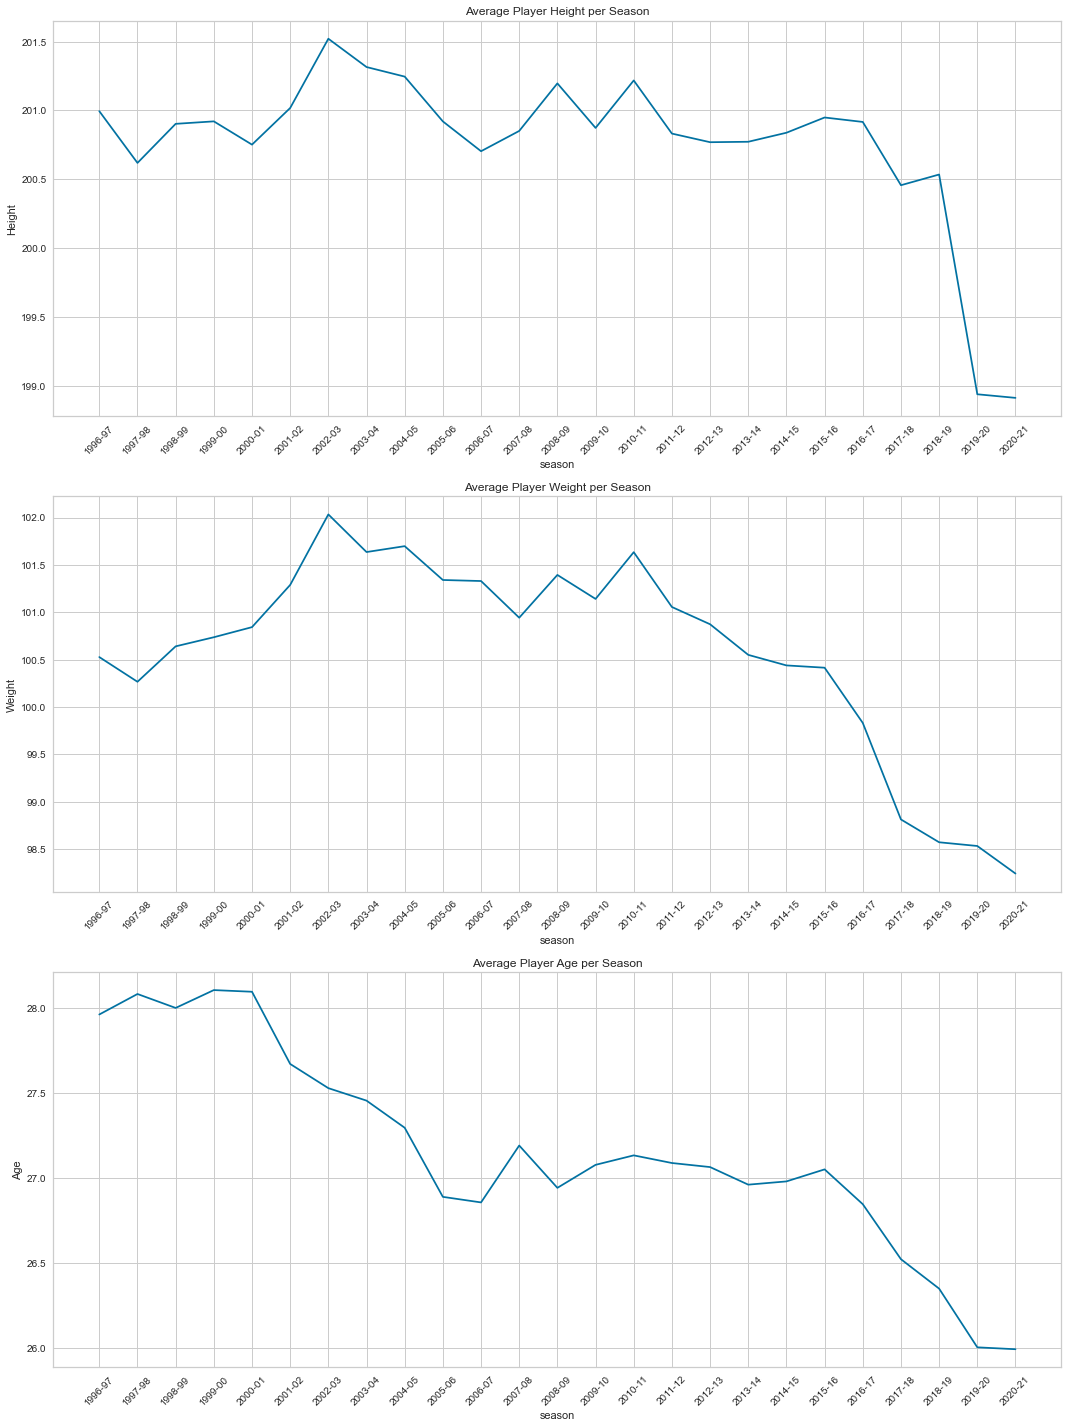

In [28]:
satu = df.groupby(['season']).agg(
    Height = ('player_height','mean'),
    Weight = ('player_weight','mean'),
    Age = ('age','mean'),
    Total = ('season','count'),
    points = ('pts','mean'),
    rebound = ('reb','mean'),
    assist = ('ast','mean')
).reset_index()
column = ['Height','Weight','Age']
data = list(satu['season'].unique())
fig, ax = plt.subplots(3, 1, figsize=(15,20))
a = 0
for i in column:
    sns.lineplot(data=satu, x='season', y=i, ax=ax[a]).set_title(f"Average Player {i} per Season")
    ax[a].set_xticklabels(labels=data,rotation=45)
    plt.tight_layout()
    a += 1

From the visualization above, we know that:
1. NBA teams seeking agile and fast player, this was shown by the downturn of average height and weight of player through years. This was also align with the visualization before that show NBA teams preference when they drafted player
2. NBA become more young, this was shown from the downturn of average age  through years

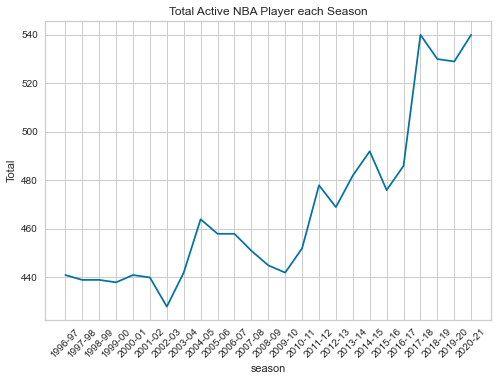

In [29]:
sns.lineplot(data = satu, x='season', y='Total')
plt.title("Total Active NBA Player each Season")
plt.xticks(rotation=45)
plt.show()

From the visualization above we know that there were increase in total player played in NBA in recent time compare through the previous years

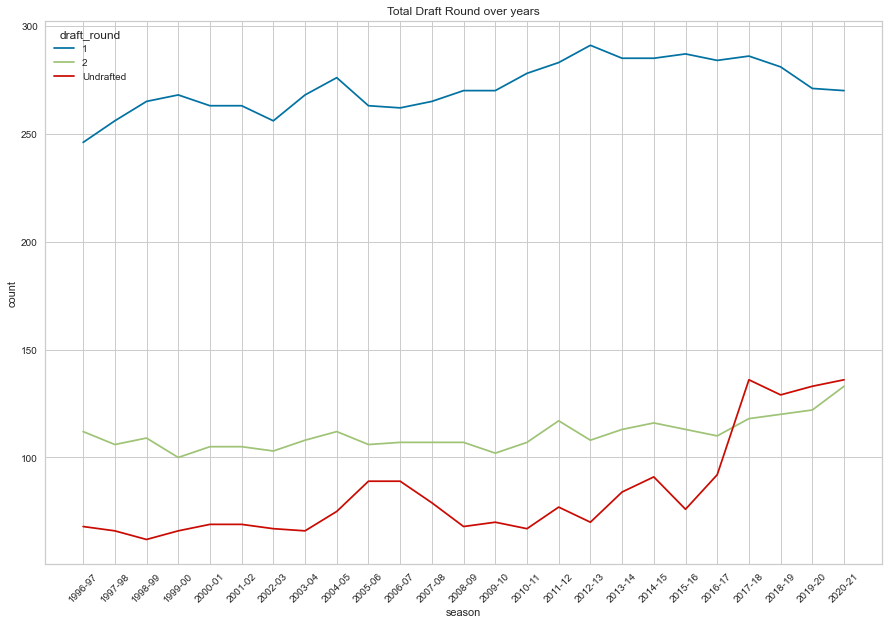

In [30]:
kedua = df.groupby(['season','draft_round']).agg(
    count = ('draft_round','count')
).reset_index()
kedua = kedua[kedua['draft_round'].isin(['1','2','Undrafted'])]
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.lineplot(data=kedua, x='season',y='count',hue='draft_round',ax=ax)
ax.set_title('Total Draft Round over years')
plt.xticks(rotation=45)
plt.show()

From the visualization above, we know that:
1. Majority of player that played in NBA is the player who being pick in the first round pick
2. In recent time NBA teams open more opportunity to player that was undrafted to play in NBA, this can be seen from the increase number of undrafted players played in NBA.

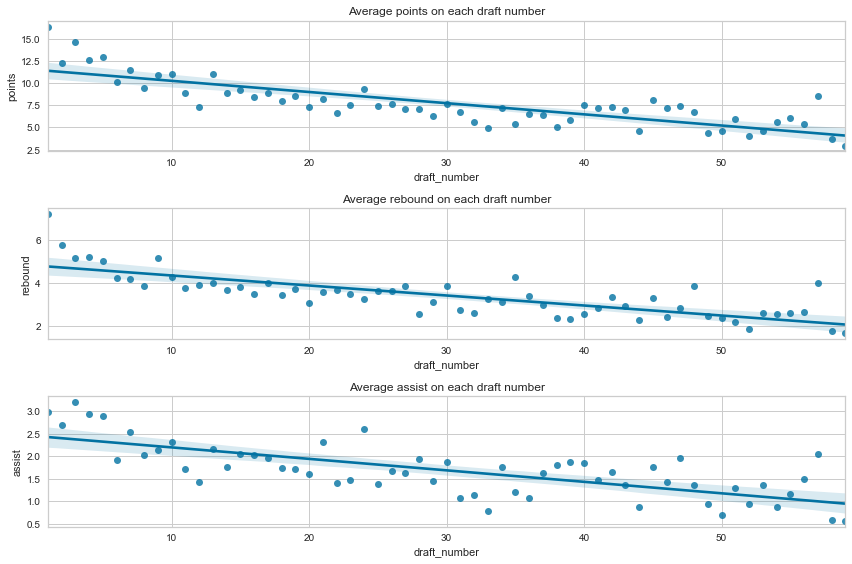

In [31]:
ketiga = df.groupby(['draft_number']).agg(
    points = ('pts','mean'),
    rebound = ('reb','mean'),
    assist = ('ast','mean')
).reset_index()
ketiga = ketiga[ketiga['draft_number'].isin(map(str,list(range(1,60))))]
ketiga['draft_number'] =ketiga['draft_number'].astype(int)
fig, ax = plt.subplots(3,1,figsize=(12,8))
column = ['points','rebound','assist']
a = 0
for i in column:
    sns.regplot(data=ketiga,x='draft_number',y=i,ax=ax[a]).set_title(f'Average {i} on each draft number')
    plt.tight_layout()
    a += 1

from this visualization, we know that player with higher draft number tend to contribute more to the teams. This means that draft number is still important to the teams because player who being pick with higher draft number tends to contribute more for the teams

<ipython-input-32-8c9d103c2ea7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)
<ipython-input-32-8c9d103c2ea7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)
<ipython-input-32-8c9d103c2ea7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[a].set_xticklabels(labels=data,rotation=45)


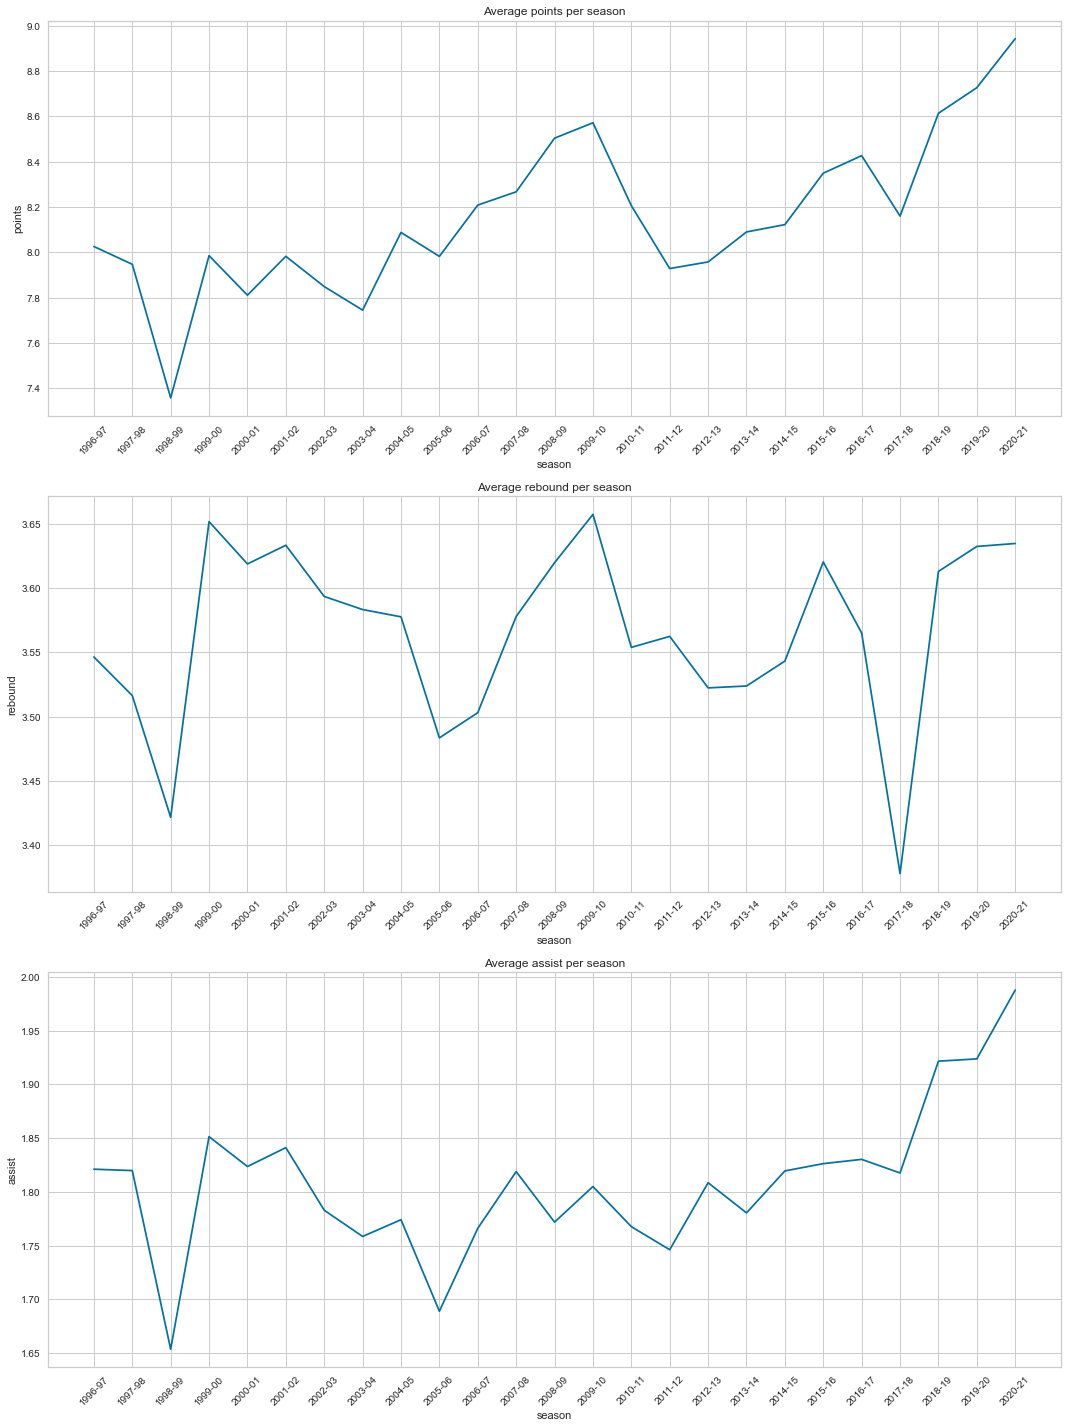

In [32]:
column = ['points','rebound','assist']
data = list(satu['season'].unique())
fig, ax = plt.subplots(3, 1, figsize=(15,20))
a = 0
for i in column:
    sns.lineplot(data=satu, x='season', y=i, ax=ax[a]).set_title(f"Average {i} per season")
    ax[a].set_xticklabels(labels=data,rotation=45)
    plt.tight_layout()
    a += 1

### Player Analysis

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [49]:
df['total_point'] = round(df['pts'] * df['gp'])
df['total_assist'] = round(df['ast'] * df['gp'])
df['total_rebound'] = round(df['reb'] * df['gp'])
df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,total_point,total_assist,total_rebound
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,341.0,36.0,320.0
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,2.0,0.0,5.0
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,320.0,64.0,114.0
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,577.0,104.0,326.0
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,155.0,21.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21,36.0,58.0,23.0
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21,192.0,44.0,89.0
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21,238.0,23.0,43.0
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,4.2,0.025,0.133,0.194,0.614,0.056,2020-21,764.0,57.0,234.0


In [57]:
ichi = df.groupby(['player_name']).agg(
    count = ('player_name','count'),
    net_rating = ('net_rating','mean'),
    game_played = ('gp','sum'),
    total_point = ('total_point','sum'),
    total_assist = ('total_assist','sum'),
    total_rebound = ('total_rebound','sum'),
    greatest_pts_ave = ('pts','max'),
    greatest_ast_ave = ('ast','max'),
    greatest_reb_ave = ('reb','max')
).reset_index()

By looking through the net rating, we found that there were player that had abnormal net rating. And majority of those net rating comes from player who played only 1-5 games in their entire career. So before I show the analysis about the net_rating, I will drop player who only played for 5 games in their entire career

In [53]:
ichi = ichi[ichi['game_played']>5]

Text(0.5, 0, 'Total Season Played')

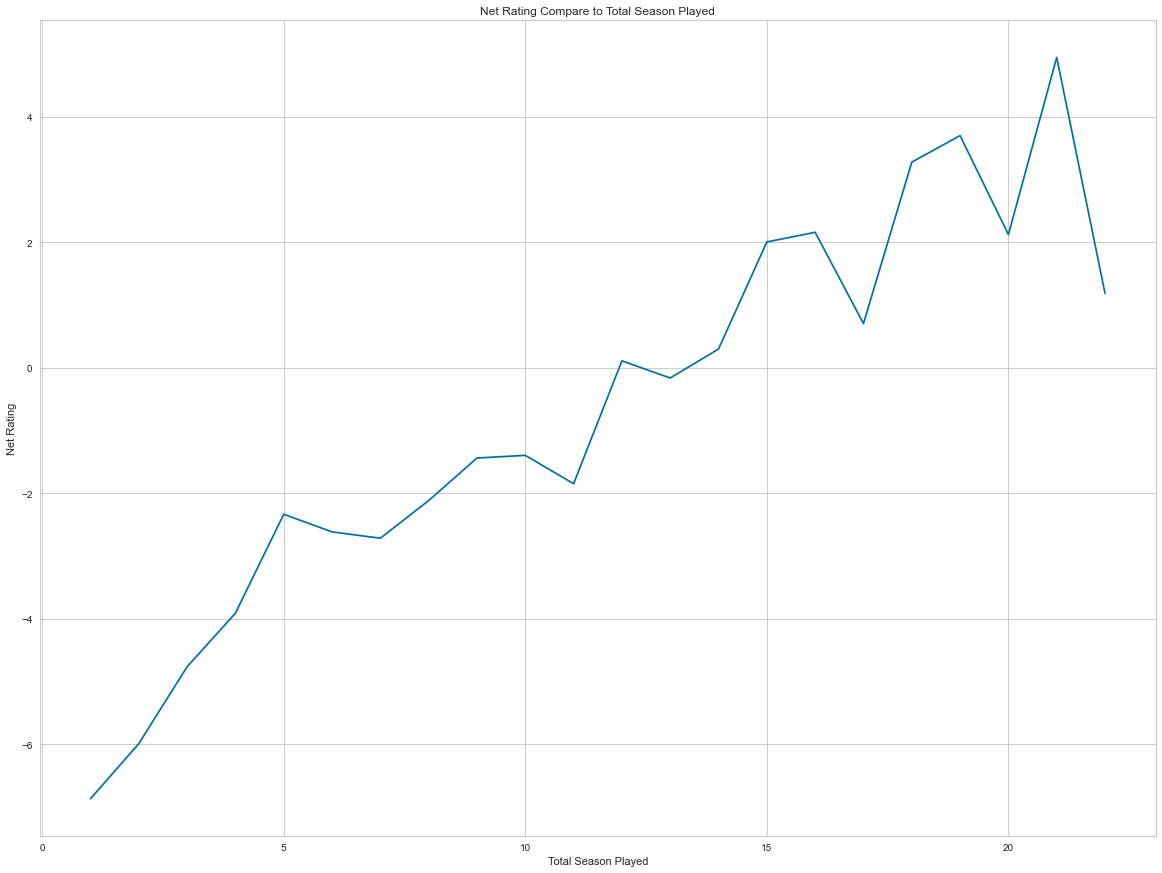

In [54]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.lineplot(data=ichi,x='count',y='net_rating',ci=None)
ax.set_title('Net Rating Compare to Total Season Played')
ax.set_ylabel("Net Rating")
ax.set_xlabel('Total Season Played')

Text(0.5, 0, 'Total Games Player Participate')

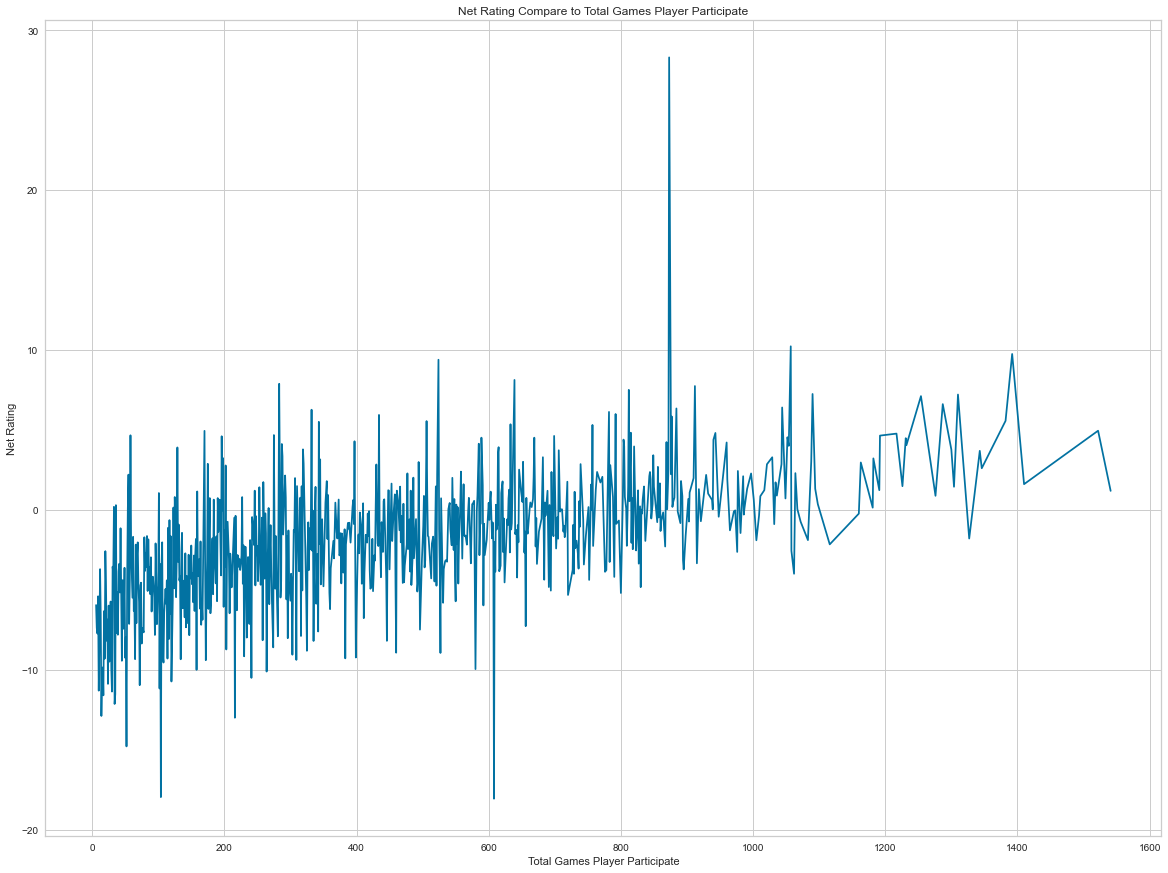

In [55]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.lineplot(data=ichi,x='game_played',y='net_rating',ci=None)
ax.set_title('Net Rating Compare to Total Games Player Participate')
ax.set_ylabel("Net Rating")
ax.set_xlabel('Total Games Player Participate')

From the two visualization above, we know that the greater the number of matches that the player participates in, the higher the average net rating of the player during his career in the NBA. This visualization shows that we can still rely on veteran player to give positive contribution to the teams

Text(0.5, 0, 'Total Point')

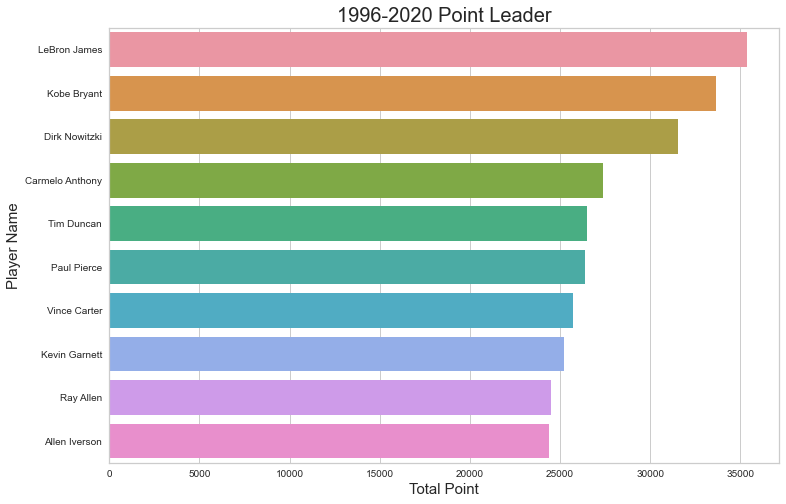

In [68]:
data = ichi.sort_values('total_point',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'total_point', y = 'player_name')
ax.set_title('1996-2020 Point Leader',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Total Point',fontsize=15)

Text(0.5, 0, 'Total Assist')

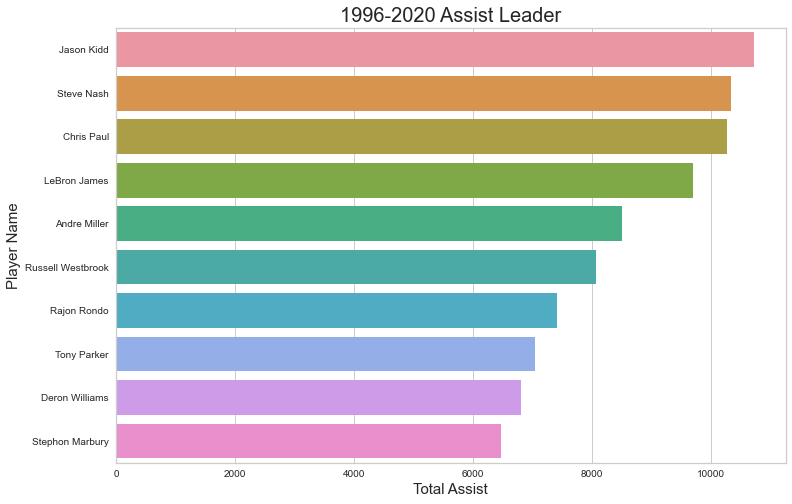

In [71]:
data = ichi.sort_values('total_assist',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'total_assist', y = 'player_name')
ax.set_title('1996-2020 Assist Leader',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Total Assist',fontsize=15)

Text(0.5, 0, 'Total Rebound')

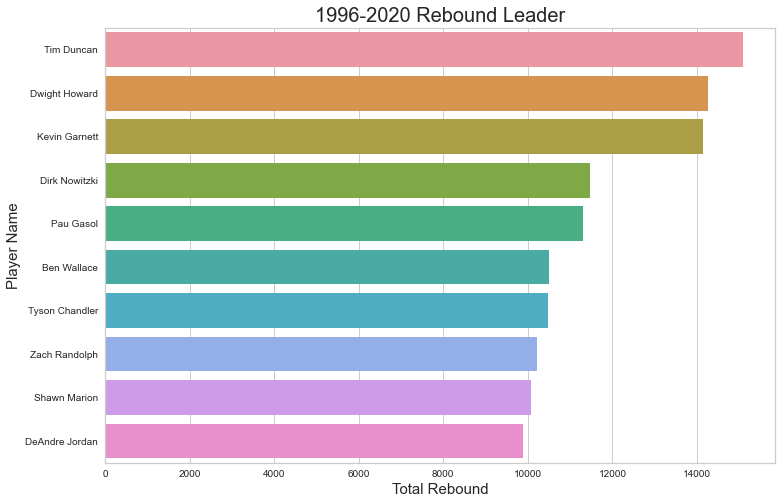

In [72]:
data = ichi.sort_values('total_rebound',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'total_rebound', y = 'player_name')
ax.set_title('1996-2020 Rebound Leader',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Total Rebound',fontsize=15)

Text(0.5, 0, 'Point Average per Season')

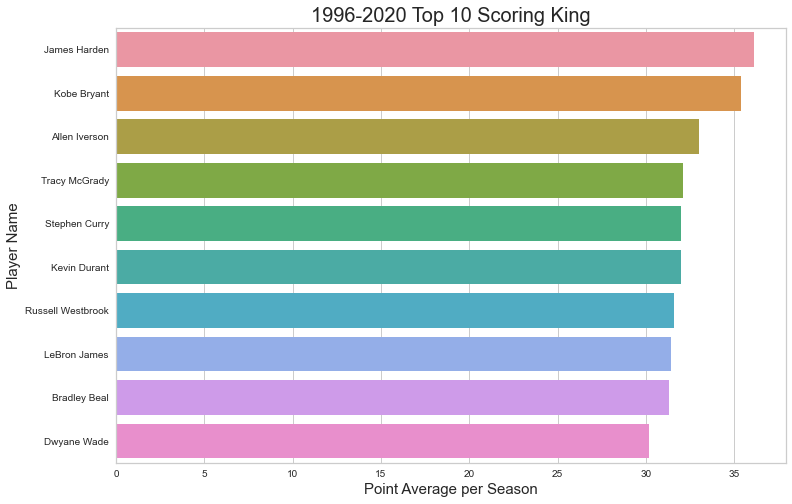

In [80]:
data = ichi.sort_values('greatest_pts_ave',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'greatest_pts_ave', y = 'player_name')
ax.set_title('1996-2020 Top 10 Scoring King',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Point Average per Season',fontsize=15)

Text(0.5, 0, 'Assist Average per Season')

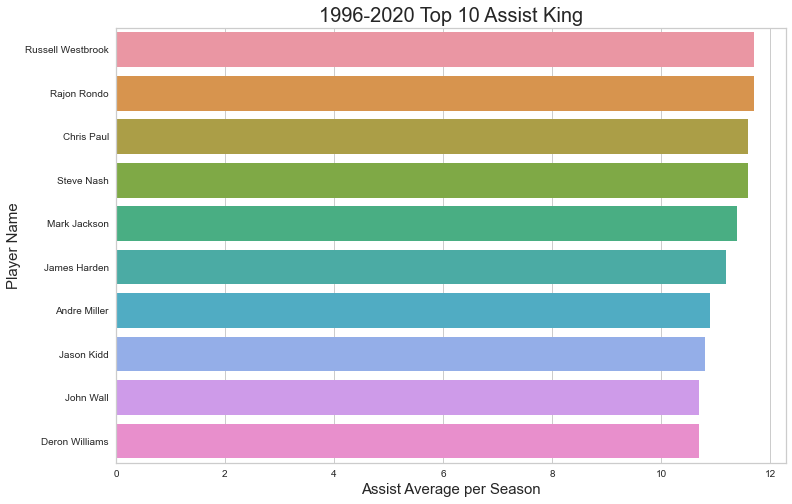

In [81]:
data = ichi.sort_values('greatest_ast_ave',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'greatest_ast_ave', y = 'player_name')
ax.set_title('1996-2020 Top 10 Assist King',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Assist Average per Season',fontsize=15)

Text(0.5, 0, 'Rebound Average per Season')

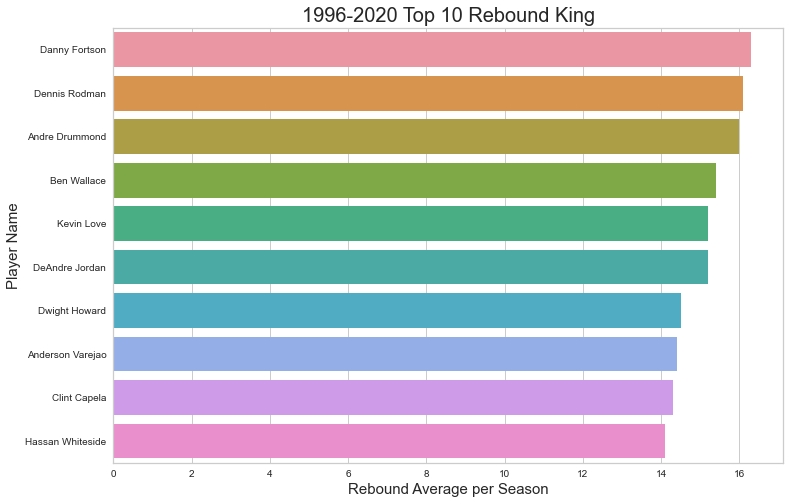

In [82]:
data = ichi.sort_values('greatest_reb_ave',axis=0,ascending=False).head(10)
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = data, x = 'greatest_reb_ave', y = 'player_name')
ax.set_title('1996-2020 Top 10 Rebound King',fontsize=20)
ax.set_ylabel("Player Name",fontsize=15)
ax.set_xlabel('Rebound Average per Season',fontsize=15)

In [79]:
nii = df.groupby(['season']).agg(
    point = ('total_point','sum'),
    assist = ('total_assist','sum'),
    rebound = ('total_rebound','sum')
).reset_index()

,season,point,assist,rebound
0,1996-97,230407.0,52456.0,97815.0
1,1997-98,227256.0,52392.0,98804.0
2,1998-99,132843.0,30064.0,60367.0
3,1999-00,231770.0,53178.0,102125.0
4,2000-01,225506.0,51895.0,101062.0
5,2001-02,227033.0,52089.0,100823.0
6,2002-03,226197.0,51150.0,100587.0
7,2003-04,222167.0,50676.0,100309.0
8,2004-05,239145.0,52383.0,102961.0
9,2005-06,238644.0,50743.0,100673.0


<ipython-input-85-65b66e2f19b0>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=data,rotation=45)


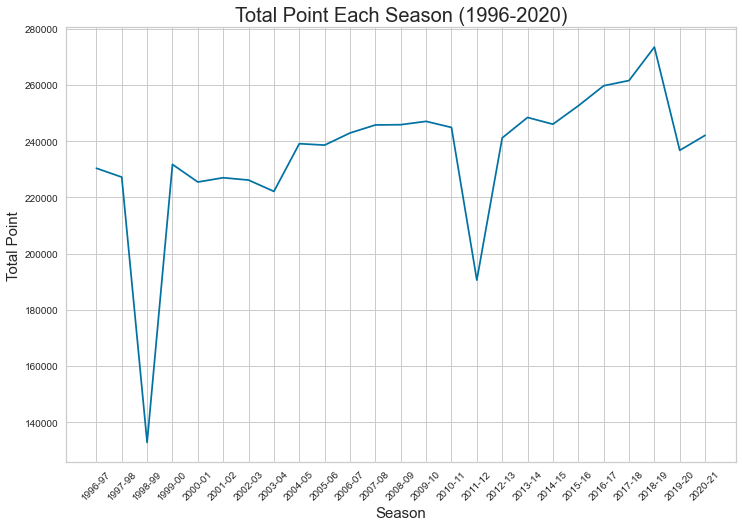

In [85]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
data = list(nii['season'].unique())
sns.lineplot(data=nii,x='season',y='point',ci=None)
ax.set_title('Total Point Each Season (1996-2020)',fontsize=20)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Total Point',fontsize=15)
ax.set_xticklabels(labels=data,rotation=45)
plt.show()

<ipython-input-86-0c81fc03071e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=data,rotation=45)


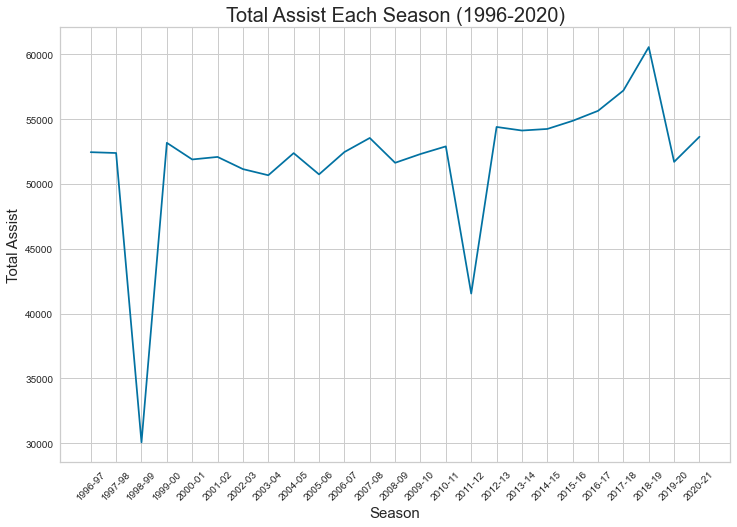

In [86]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
data = list(nii['season'].unique())
sns.lineplot(data=nii,x='season',y='assist',ci=None)
ax.set_title('Total Assist Each Season (1996-2020)',fontsize=20)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Total Assist',fontsize=15)
ax.set_xticklabels(labels=data,rotation=45)
plt.show()

<ipython-input-87-f5e7e576eb17>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=data,rotation=45)


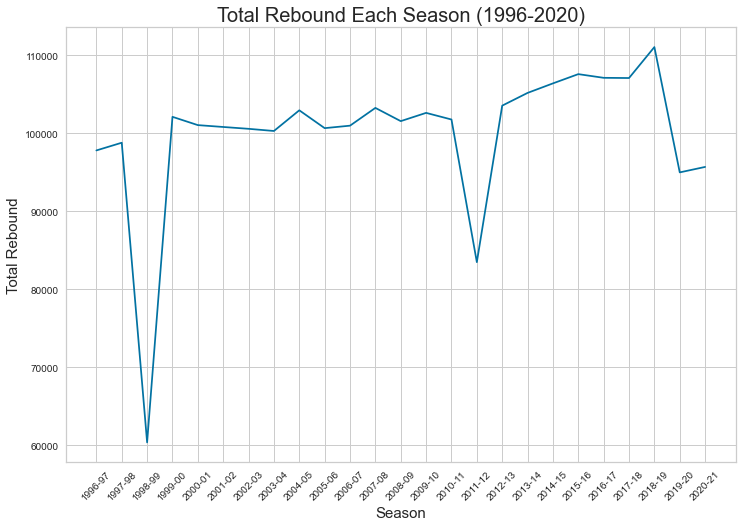

In [87]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
data = list(nii['season'].unique())
sns.lineplot(data=nii,x='season',y='rebound',ci=None)
ax.set_title('Total Rebound Each Season (1996-2020)',fontsize=20)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Total Rebound',fontsize=15)
ax.set_xticklabels(labels=data,rotation=45)
plt.show()

Three visualization above shows that there were increase in total point, rebound, and assist in single season. This was cause by small ball game that demanded faster pace of play, faster pace of play tends to generated more point, rebound, and assist because it was easier to get them

# Conclusion
1. From the visualization above, we know that NBA tends to moves forward to small ball games. 
2. Player had higher average point, rebound, and assist in recent years because the increase importance of the small ball game
3. There were change in NBA teams preference from big man era (1990's - 2000's) to small ball era (2010's - now), the changes make NBA teams tend to seek player who had smaller stature (lower height and weight)
4. It's seems that NBA internationalization that started from david stern era was successful, this was shown from more player originated outside of USA